In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import (Input, Dense, Concatenate)
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
# Load data
from keras.datasets import mnist


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows * img_cols, )


In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
print(x_train.shape[0])
print(np.prod(x_train.shape[1:]))
print(x_test.shape[0])
print(np.prod(x_test.shape[1:]))

60000
784
10000
784


In [0]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
#  creates an array of specified shape and fills it with random values which is actually a part of Normal(Gaussian)Distribution. This is Distribution is also known as Bell Curve 
# because of its characteristics shape.
# mean=0, standard deviation=1
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
x_feat_train = np.concatenate((x_train, x_test), axis=0)
x_feat_train_noisy = np.concatenate((x_train_noisy, x_test_noisy), axis=0)

In [12]:
print(x_feat_train_noisy.shape[0], ' dae train samples')
print(x_feat_train.shape[0])

70000  dae train samples
70000


In [0]:
def DEEP_DAE(features_shape, act='relu'):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder / Decoder
    o = Dense(1024, activation=act, name='dense1')(o)
    o = Dense(1024, activation=act, name='dense2')(o)
    o = Dense(1024, activation=act, name='dense3')(o)
    dec = Dense(784, activation='sigmoid', name='dense_dec')(o)
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)


In [0]:
batch_size = 128
epochs = 40
            

In [15]:

autoenc = DEEP_DAE(input_shape)
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              803840    
_________________________________________________________________
dense2 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
dense3 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
dense_dec (Dense)            (None, 784)               803600    
Total params: 3,706,640
Trainable params: 3,706,640
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoenc.fit(x_feat_train_noisy, x_feat_train, epochs=epochs, 
            batch_size=batch_size, shuffle=True)

Epoch 1/40
70000/70000 [==============================] - 57s 817us/step - loss: 0.2484
Epoch 2/40
70000/70000 [==============================] - 57s 811us/step - loss: 0.1800
Epoch 3/40
70000/70000 [==============================] - 57s 810us/step - loss: 0.1552
Epoch 4/40
70000/70000 [==============================] - 57s 809us/step - loss: 0.1421
Epoch 5/40
70000/70000 [==============================] - 57s 810us/step - loss: 0.1342
Epoch 6/40
70000/70000 [==============================] - 56s 804us/step - loss: 0.1287
Epoch 7/40
70000/70000 [==============================] - 57s 813us/step - loss: 0.1249
Epoch 8/40
70000/70000 [==============================] - 56s 800us/step - loss: 0.1219
Epoch 9/40
70000/70000 [==============================] - 56s 801us/step - loss: 0.1195
Epoch 10/40
70000/70000 [==============================] - 56s 805us/step - loss: 0.1177
Epoch 11/40
70000/70000 [==============================] - 56s 800us/step - loss: 0.1160
Epoch 12/40
70000/70000 [=====

In [0]:
decoded_imgs = autoenc.predict(x_feat_train_noisy)

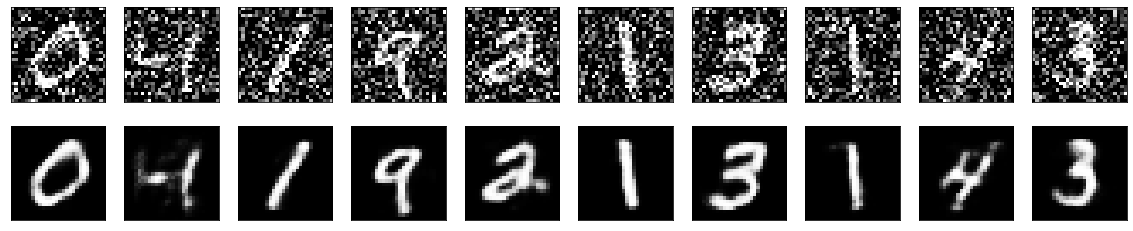

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_feat_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [0]:
def FEATURES(model):
    input_ = model.get_layer('inputs').input
    feat1 = model.get_layer('dense1').output
    feat2 = model.get_layer('dense2').output
    feat3 = model.get_layer('dense3').output
    # feat1, feat2,
    feat4 = model.get_layer('dense_dec').output
    # feat = Concatenate(name='concat')([feat1,feat2,feat3])
    feat=feat4
    model = Model(inputs=[input_],
                      outputs=[feat])
    return model

In [20]:
_model = FEATURES(autoenc)
features_train = _model.predict(x_train)
features_test = _model.predict(x_test)
print(features_train.shape, ' train samples shape')
print(features_test.shape, ' train samples shape')

(60000, 784)  train samples shape
(10000, 784)  train samples shape


In [0]:
def DNN(features_shape, num_classes, act='relu'):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Encoder / Decoder
    o = Dense(64, activation=act, name='dense1')(o)
    o = Dense(64, activation=act, name='dense2')(o)
    o = Dense(64, activation=act, name='dense3')(o)
    y_pred = Dense(num_classes, activation='sigmoid', name='pred')(o)
    
    # Print network summary
    Model(inputs=x, outputs=y_pred).summary()
    
    return Model(inputs=x, outputs=y_pred)

In [0]:
input_shape2 = (features_train.shape[1], )
num_classes = 10
y_train_ohe = np_utils.to_categorical(y_train, num_classes)
y_test_ohe = np_utils.to_categorical(y_test, num_classes)
 
batch_size = 128
epochs = 20
model_fname = 'dnn'



In [23]:
callbacks = [ModelCheckpoint(monitor='val_acc', filepath=model_fname + '.hdf5',
                             save_best_only=True, save_weights_only=True,
                             mode='min')]
            
deep = DNN(input_shape2, num_classes)
deep.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 64)                50240     
_________________________________________________________________
dense2 (Dense)               (None, 64)                4160      
_________________________________________________________________
dense3 (Dense)               (None, 64)                4160      
_________________________________________________________________
pred (Dense)                 (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [24]:

history = deep.fit(features_train, y_train_ohe, epochs=epochs, 
                   batch_size=batch_size, shuffle=True,
                   validation_data=(features_test, y_test_ohe), 
                   callbacks=callbacks)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1032 - acc: 0.9645 - val_loss: 0.0486 - val_acc: 0.9846
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0432 - acc: 0.9862 - val_loss: 0.0385 - val_acc: 0.9876
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0344 - acc: 0.9888 - val_loss: 0.0332 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0263 - acc: 0.9915 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0236 - acc: 0.9923 - val_loss: 0.0240 - val_acc: 0.9920
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0236 - val_acc

In [0]:

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
deep.load_weights(model_fname + '.hdf5')
predictions = deep.predict(features_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

[7 2 1 ... 4 5 6]


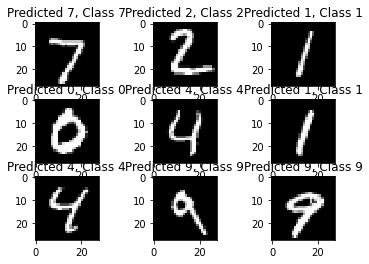

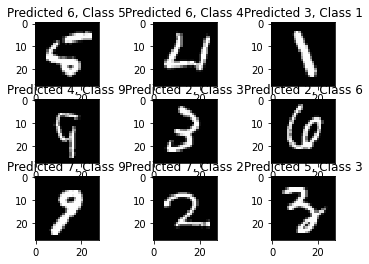

In [0]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

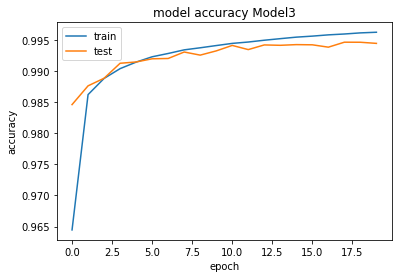

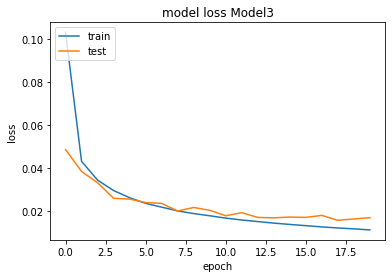

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy Model3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss Model3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()